# Random potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Np=128

In [21]:
Vi=np.random.uniform(0,1,Np)

k=np.fft.rfftfreq(Np)
kc=.0125
kc=np.random.uniform(1,10)*k[1]
V0=3
M=4
Vk=V0*np.fft.rfft(Vi)
Vx=np.fft.irfft(np.exp(-(k/kc)**M)*Vk)
print(kc,k[1],k[2])

0.0581484359833 0.0078125 0.015625


In [24]:
beta=0.5
x=np.arange(Np)
x1=Np//5
f1=0.5*(1-np.tanh(beta*(x-x1)))
x2=x[-1]-x1
f2=0.5*(1+np.tanh(beta*(x-x2)))
f12=1-f1-f2

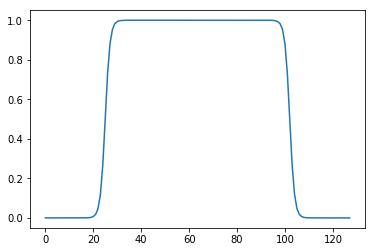

In [30]:
#plt.plot(Vi)
#plt.plot(Vx)
#plt.plot(f1)
#plt.plot(f2)
plt.plot(f12)
#Vmax=2
#plt.plot(Vmax*(f1+f2)+Vx*f12)
#plt.plot(Vx*f12)